## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

NameError: name 'corr' is not defined

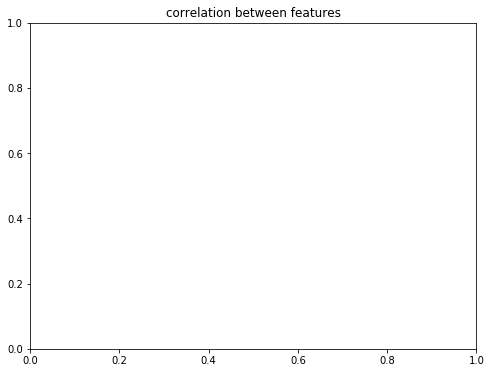

In [5]:
plt.figure(figsize=(8,6))
plt.title("correlation between features")
sns.heatmap(corr, cmap="BrBG",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Task: 1 Logistic Regression

# 1. Find the coorelation between the features

## a. check the correlation between the features

In [6]:
corr=data[data.columns[:-1]].corr()
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


## b. plot heat map of correlation matrix using seaborn heatmap

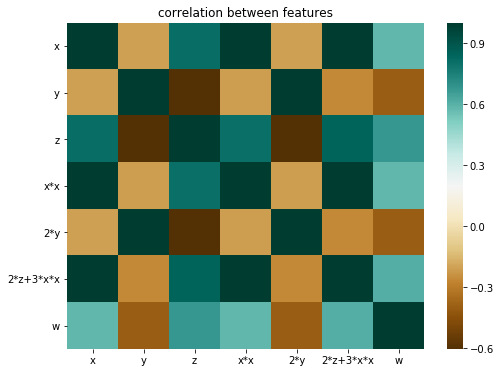

In [7]:
plt.figure(figsize=(8,6))
plt.title("correlation between features")
sns.heatmap(corr, cmap="BrBG",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 2. Finding the best model for the given data

## a. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

In [8]:
alpha =  np.logspace(-5, 8, 10)
print(alpha)
param_grid={'C':alpha}
logreg = LogisticRegression()

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


## b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

In [9]:
logreg = GridSearchCV(logreg, param_grid, cv=5)

In [10]:
logreg.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 2.78256e-04, 7.74264e-03, 2.15443e-01, 5.99484e+00,
       1.66810e+02, 4.64159e+03, 1.29155e+05, 3.59381e+06, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# c. Create a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'

In [11]:
logreg.best_params_

{'C': 1e-05}

# 3. Getting the weights with the original data

# a. train the 'best_model' with X, Y

In [12]:
best_model=LogisticRegression(C=1e-05)

In [13]:
best_model.fit(X,Y)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predictions = best_model.predict(X)

# b. Check the accuracy of the model 'best_model_accuracy'

In [15]:
accu=accuracy_score(Y, predictions)
print(accuracy_score(Y, predictions))

1.0


# c. Get the weights W using best_model.coef_

In [16]:
wei=best_model.coef_[0]
print(best_model.coef_)

[[ 0.00036369 -0.000345    0.00048449  0.00035933 -0.000345    0.00038189
   0.00032048]]


# 4. Modifying original data

## a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

In [17]:
X_NEW=X+.01

## b. Train the same 'best_model' with data (X', Y)

In [18]:
updated_model=best_model.fit(X_NEW,Y)

In [19]:
prediction = best_model.predict(X_NEW)

## c. Check the accuracy of the model 'best_model_accuracy_edited'

In [20]:
new_accu=accuracy_score(Y, prediction)
print(accuracy_score(Y, prediction))

1.0


## d. Get the weights W' using best_model.coef_

In [21]:
w_new=updated_model.coef_
w_new

array([[ 0.00036369, -0.000345  ,  0.00048449,  0.00035933, -0.000345  ,
         0.00038189,  0.00032048]])

#  5.  Checking deviations in metric and weights

## a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [22]:
print(new_accu-accu)

0.0


## b. find the absolute change between each value of W and W' ==> |(W-W')| 

In [23]:
difference=abs((wei-w_new))[0]
print(difference)

[3.04620171e-11 3.04801046e-11 3.04930581e-11 3.04600787e-11
 3.04801046e-11 3.04634312e-11 3.04687841e-11]


## c. print the top 4 features which have higher % change in weights compare to the other feature

In [24]:
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                   # calulating the percentage change in weight
    cp=(difference[i]/wei[i])*100
    percentage_change.append(cp)

In [25]:
columns=list(data.columns.values)
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]
print("the top 4 features which have higher % change in weights ")
for j in indices:
    print(columns[j])

the top 4 features which have higher % change in weights 
2*z+3*x*x
x
x*x
w


# Task: 2 Linear SVM

# 2. Finding the best model for the given data

## a. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

In [26]:
alpha =  np.logspace(-5, 8, 10)
print(alpha)
param_grid={'C':alpha}
svm = SVC(kernel="linear")

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


## b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

In [27]:
model = GridSearchCV(svm, param_grid, cv=5)

In [28]:
model.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 2.78256e-04, 7.74264e-03, 2.15443e-01, 5.99484e+00,
       1.66810e+02, 4.64159e+03, 1.29155e+05, 3.59381e+06, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# c. Create a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'

In [29]:
model.best_params_

{'C': 0.007742636826811269}

# 3. Getting the weights with the original data

# a. train the 'best_model' with X, Y

In [30]:
best_model=SVC(kernel='linear',C=0.007742636826811269)

In [31]:
best_model.fit(X,Y)

SVC(C=0.007742636826811269, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# b. Check the accuracy of the model 'best_model_accuracy'

In [32]:
predictions = best_model.predict(X)
accu=accuracy_score(Y, predictions)
print(accuracy_score(Y, predictions))

1.0


# c. Get the weights W using best_model.coef_

In [33]:
wei=best_model.coef_[0]
print(best_model.coef_)

[[ 0.16056222 -0.20788705  0.32826166  0.14998082 -0.20788705  0.17461587
   0.13401176]]


# 4. Modifying original data

## a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

In [34]:
X_NEW=X+.01

## b. Train the same 'best_model' with data (X', Y)

In [35]:
updated_model=best_model.fit(X_NEW,Y)

In [36]:
prediction = best_model.predict(X_NEW)

## c. Check the accuracy of the model 'best_model_accuracy_edited'

In [37]:
new_accu=accuracy_score(Y, prediction)
print(accuracy_score(Y, prediction))

1.0


## d. Get the weights W' using best_model.coef_

In [38]:
w_new=updated_model.coef_

In [39]:
w_new#  5.  Checking deviations in metric and weights

array([[ 0.16049457, -0.20810298,  0.32832289,  0.14997999, -0.20810298,
         0.17462251,  0.13395324]])

#  5.  Checking deviations in metric and weights

## a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [40]:
print(new_accu-accu)

0.0


## b. find the absolute change between each value of W and W' ==> |(W-W')| 

In [41]:
difference=abs((wei-w_new))[0]
print(difference)

[6.76507103e-05 2.15922620e-04 6.12315122e-05 8.28999945e-07
 2.15922620e-04 6.64650571e-06 5.85197413e-05]


## c. print the top 4 features which have higher % change in weights compare to the other feature

In [42]:
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                 
    cp=(difference[i]/wei[i])*100
    percentage_change.append(cp)

In [43]:
columns=list(data.columns.values)
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]
print("the top 4 features which have higher % change in weights ")
for j in indices:
    print(columns[j])

the top 4 features which have higher % change in weights 
2*z+3*x*x
z
x
w


# OBSERVATION:

1.In correlation matrix, some features are correlated.

2.After implementing the perturbation on Support Vectro Machine and Logistic Regression,we observed the difference in weights are very minute.

3.We can conclude that there is no collinearity between features based on pertubation test.

4.From correlation matrix we can understand that top 4 features which are having higher percentage change in weights are higly correlated with other features.